<a href="https://colab.research.google.com/github/XuanJanice/Calculator-Program/blob/main/10_visualise_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Visually perform sentiment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

In [ ]:
from google.colab import output
!pip install snscrape
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/tweets.py
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
!pip install WordCLoud
output.clear()
print("Required packages installed")

## 2. Get the Data

In [ ]:
from tweets import tweets_to_df
help(tweets_to_df)

In [ ]:
# Run tweets_to_df()) method.  Your choice of keyword
search_term = input("Please enter a term to search for ")
tweets_df = 


## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html

https://twitter-data-analysis.blogspot.com/2020/08/twitter-data-analysis-part-3-sentiment.html


### Polarity
Polarity is float value which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

### Subjectivity
* Subjective sentences generally refer to personal opinion, emotion or judgment.
* Objective refers to factual information. 
* Subjectivity is a float value which lies in the range of [0,1].
* Subjectivity lies between [0.0,1.0].
 * 0.0 is very objective and 1.0 is very subjective.




In [ ]:
from textblob import TextBlob


# Creating a funtion to get the subjectivity.
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

# Creating a function to get the polarity. 
def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment
# Creating two columns to store subjectivity and polarity
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df.head()


### Plotting a graph with Subjectivity against Polarity




In [ ]:
# Plotting a graph with Subjectivity against Polarity
plt.figure(figsize=(8,6))

for i in range(1, tweets_df.shape[0]):
  plt.scatter(tweets_df["Polarity"][i], tweets_df["Subjectivity"][i], color='Blue')
  
# Labelling axis's and title
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Do a box plot of columns Subjectivity and Polarity


# Sentiment over time.

From the documentation, the values of polarity can be interpreted as sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for this exercise.

It could be interesting to plot these over time.  So, each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [ ]:
# Deciding whether the tweet is positive, neutral or negative
def sentiment(polarity):
  if polarity > 0:
      return 'Positive'
  elif polarity == 0:
      return 'Neutral'
  else:
      return 'Negative'

In [ ]:
# Add sentiment column
tweets_df['Sentiment'] = 

In [ ]:
# Lets get just the positive tweets
pos = tweets_df[

### Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [ ]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()


In [ ]:
# positive tweets per day



In [ ]:
# Plot the positive tweets per day


In [ ]:
# Now repeat for negative

In [ ]:
# repeat for neutral

### Next, we will display the number of positive, negative, or neutral tweets we have and also produce a percentage of each.


In [ ]:
tweets_df

In [ ]:
# count the unique rows in the dataframe - returns the total number of rows
tweets_df['Sentiment'].value_counts()

In [ ]:
# Finding percentage of positive tweets


In [ ]:
# Finding percentage of negative tweets


In [ ]:
# Finding percentage of neutral tweets


In [ ]:
# Creating a bar chart to visualise the count


How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

In [ ]:
import matplotlib.pyplot as plt
values = [len(pos),len(neg),len(neu)]
plt.pie(values)

We can do better. 

In [ ]:
import matplotlib.pyplot as plt
 
values = [len(pos),len(neg),len(neu)]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=True)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
 
values = [pos_percentage,neg_percentage,nue_percentage]
labels = ['Positive', 'Negative', 'Neutral']
colors = ['b', 'g', 'r']
plt.pie(values, colors=colors, labels= values,counterclock=False, shadow=True)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

#3 WordCLoud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and look at the example

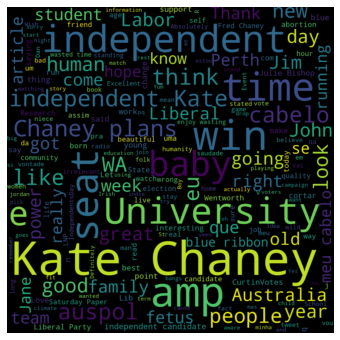

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
# Stores all the words in one string
messages = ' '.join(tweets_df['Clean Text'])

# Create the wordcloud object
wordcloud = WordCloud(width=1480, height=1480, margin=0, stopwords=ENGLISH_STOP_WORDS).generate(messages)

# Display the generated image:
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()